In [19]:
# Load the required libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt



In [21]:
# Load the data
data = pd.read_csv('.\RS AUG 24 Data FINAL.csv')

<>:2: SyntaxWarning: invalid escape sequence '\R'
<>:2: SyntaxWarning: invalid escape sequence '\R'
C:\Users\nimal\AppData\Local\Temp\ipykernel_9660\3284100228.py:2: SyntaxWarning: invalid escape sequence '\R'
  data = pd.read_csv('.\RS AUG 24 Data FINAL.csv')


In [5]:
# Display the first few rows of the data
data.head(5)

,ParticipantID,Sex,Age,SES,Smoking,Alcohol,Physical,Glucose
0,1,0,4,0,1,9,1,4.8
1,2,1,4,1,1,5,1,3.8
2,3,1,3,0,1,4,1,3.8
3,4,0,4,1,0,0,0,5.8
4,5,1,2,0,1,9,1,5.8


In [7]:
# View the summary of the data
data.describe()

,ParticipantID,Sex,Age,SES,Smoking,Alcohol,Physical,Glucose
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,0.520000,2.012500,0.997500,0.506250,7.507500,0.500000,6.179000
std,231.0844,0.499912,1.415043,0.809823,0.500274,4.637545,0.500313,2.204702
min,1.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,200.7500,0.000000,1.000000,0.000000,0.000000,4.000000,0.000000,4.400000
50%,400.5000,1.000000,2.000000,1.000000,1.000000,8.000000,0.500000,5.900000
75%,600.2500,1.000000,3.000000,2.000000,1.000000,11.000000,1.000000,6.900000
max,800.0000,1.000000,4.000000,2.000000,1.000000,15.000000,1.000000,12.000000


In [9]:
# Convert categorical variables to appropriate types
data['Smoking'] = data['Smoking'].astype('category')
data['Alcohol'] = data['Alcohol'].astype('category')
data['Physical'] = data['Physical'].astype('category')

In [11]:
#-------- One-Way ANOVA-------------

# Smoking
model_smoking = ols('Glucose ~ Smoking', data=data).fit()
anova_table_smoking = sm.stats.anova_lm(model_smoking, typ=2)
print('One-Way ANOVA for Smoking:\n', anova_table_smoking)

# Alcohol
model_alcohol = ols('Glucose ~ Alcohol', data=data).fit()
anova_table_alcohol = sm.stats.anova_lm(model_alcohol, typ=2)
print('\nOne-Way ANOVA for Alcohol:\n', anova_table_alcohol)

# Physical Activity
model_physical = ols('Glucose ~ Physical', data=data).fit()
anova_table_physical = sm.stats.anova_lm(model_physical, typ=2)
print('\nOne-Way ANOVA for Physical Activity:\n', anova_table_physical)

One-Way ANOVA for Smoking:
                sum_sq     df         F    PR(>F)
Smoking      4.353405    1.0  0.895514  0.344274
Residual  3879.353795  798.0       NaN       NaN

One-Way ANOVA for Alcohol:
                sum_sq     df         F    PR(>F)
Alcohol     90.255505   15.0  1.243552  0.233058
Residual  3793.451695  784.0       NaN       NaN

One-Way ANOVA for Physical Activity:
              sum_sq     df         F    PR(>F)
Physical     0.1682    1.0  0.034562  0.852563
Residual  3883.5390  798.0       NaN       NaN


In [13]:
# Two-Way ANOVA
model_2way = ols('Glucose ~ Smoking + Alcohol + Smoking:Alcohol', data=data).fit()
anova_table_2way = sm.stats.anova_lm(model_2way, typ=2)
print('\nTwo-Way ANOVA:\n', anova_table_2way)


Two-Way ANOVA:
                       sum_sq     df         F    PR(>F)
Smoking             3.274170    1.0  0.676723  0.410973
Alcohol            89.176269   15.0  1.228762  0.243848
Smoking:Alcohol    74.385114   15.0  1.024954  0.426453
Residual         3715.792412  768.0       NaN       NaN


In [15]:
# Three-Way ANOVA
model_3way = ols('Glucose ~ Smoking + Alcohol + Physical + Smoking:Alcohol:Physical', data=data).fit()
anova_table_3way = sm.stats.anova_lm(model_3way, typ=2)
print('\nThree-Way ANOVA:\n', anova_table_3way)


Three-Way ANOVA:
                                sum_sq     df         F    PR(>F)
Smoking                      3.414447    1.0  0.705887  0.401085
Alcohol                     89.716607   15.0  1.236507  0.238327
Physical                     0.800247    1.0  0.165439  0.684315
Smoking:Alcohol:Physical   229.271505   46.0  1.030403  0.419557
Residual                  3560.105773  736.0       NaN       NaN


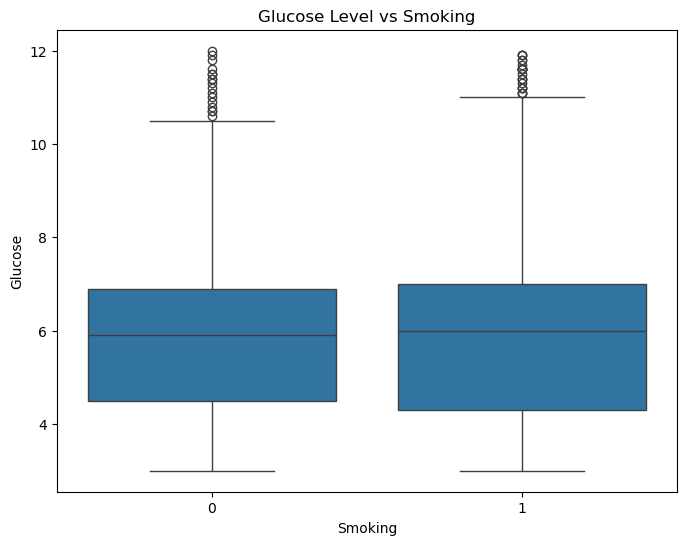

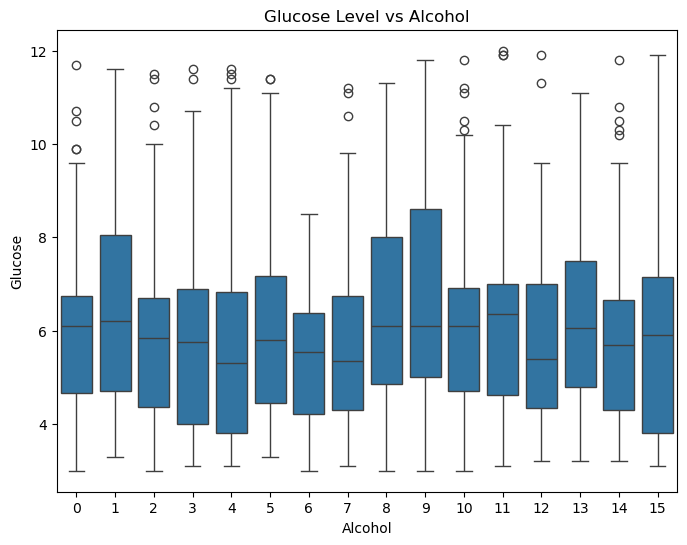

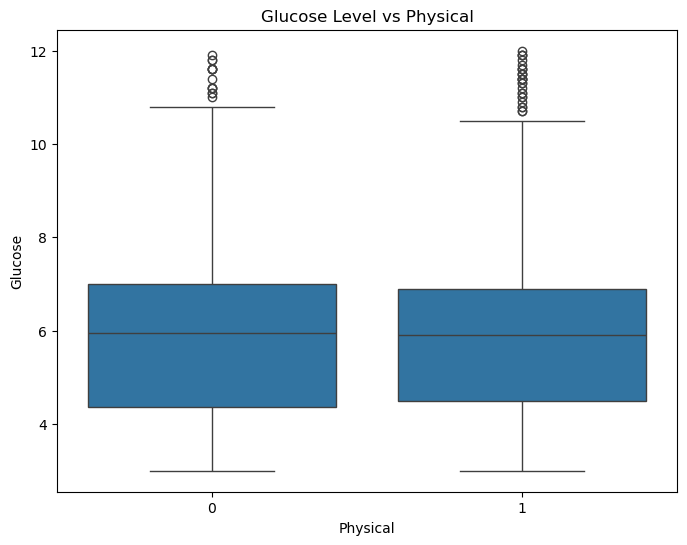

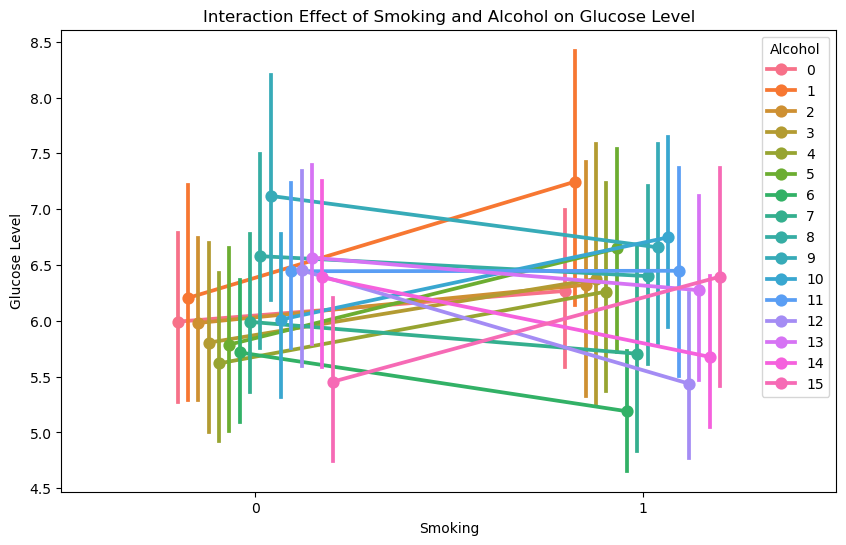

In [17]:
#------------------ Visualizations------------

# Box plots
categorical_vars = ['Smoking', 'Alcohol', 'Physical']
for var in categorical_vars:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=var, y='Glucose', data=data)
    plt.title(f'Glucose Level vs {var}')
    plt.show()
    
# Interaction plot (if significant interaction in Two/Three-Way ANOVA)
# Interaction between Smoking and Alcohol
plt.figure(figsize=(10, 6))
sns.pointplot(x='Smoking', y='Glucose', hue='Alcohol', data=data, dodge=True)
plt.title('Interaction Effect of Smoking and Alcohol on Glucose Level')
plt.ylabel('Glucose Level')
plt.show()